# Fig 6.5

Model of G-protein signalling pathway

In [1]:
using ModelingToolkit
using Catalyst
using DifferentialEquations
using Plots
Plots.default(linewidth=2)

In [2]:
rn = @reaction_network begin
    @parameters L(t)
    (kRL * L, kRLm), R <--> RL
    kGa, G + RL --> Ga + Gbg + RL
    kGd0, Ga --> Gd
    kG1, Gd + Gbg --> G
end

Model ##ReactionSystem#342:
Unknowns (6): see unknowns(##ReactionSystem#342)
  R(t)
  RL(t)
  G(t)
  Ga(t)
  ⋮
Parameters (6): see parameters(##ReactionSystem#342)
  L(t)
  kRL
  kRLm
  kGa
  ⋮

In [3]:
setdefaults!(rn, [
    :kRL => 2e6,
    :kRLm => 0.01,
    :kGa => 1e-5,
    :kGd0 => 0.11,
    :kG1 => 1,
    :R => 4e3,
    :RL => 0.,
    :G => 1e4,
    :Ga => 0.,
    :Gd => 0.,
    :Gbg => 0.,
    :L => 0.
])

@unpack L = rn
discrete_events = [[200] => [L~1e-9], [800] => [L~0.0]]
osys = convert(ODESystem, rn; discrete_events, remove_conserved = true) |> structural_simplify

┌ Warning: You are creating a system or problem while eliminating conserved quantities. Please note,
│         due to limitations / design choices in ModelingToolkit if you use the created system to
│         create a problem (e.g. an `ODEProblem`), or are directly creating a problem, you *should not*
│         modify that problem's initial conditions for species (e.g. using `remake`). Changing initial
│         conditions must be done by creating a new Problem from your reaction system or the
│         ModelingToolkit system you converted it into with the new initial condition map.
│         Modification of parameter values is still possible, *except* for the modification of any
│         conservation law constants (Γ), which is not possible. You might
│         get this warning when creating a problem directly.
│ 
│         You can remove this warning by setting `remove_conserved_warn = false`.
└ @ Catalyst ~/.julia/packages/Catalyst/48wH3/src/reactionsystem_conversions.jl:456


Model ##ReactionSystem#342:
Equations (3):
  3 standard: see equations(##ReactionSystem#342)
Unknowns (3): see unknowns(##ReactionSystem#342)
  R(t) [defaults to 4000.0]
  G(t) [defaults to 10000.0]
  Ga(t) [defaults to 0.0]
Parameters (9): see parameters(##ReactionSystem#342)
  kGa [defaults to 1.0e-5]
  kRL [defaults to 2.0e6]
  Γ[1] [defaults to R(t) + RL(t)]
  kGd0 [defaults to 0.11]
  ⋮
Observed (3): see observed(##ReactionSystem#342)

## Fig 6.5 A

┌ Warning: Initialization system is overdetermined. 3 equations for 0 unknowns. Initialization will default to using least squares. `SCCNonlinearProblem` can only be used for initialization of fully determined systems and hence will not be used here. To suppress this warning pass warn_initialize_determined = false. To make this warning into an error, pass fully_determined = true
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/klLLV/src/systems/diffeqs/abstractodesystem.jl:1354


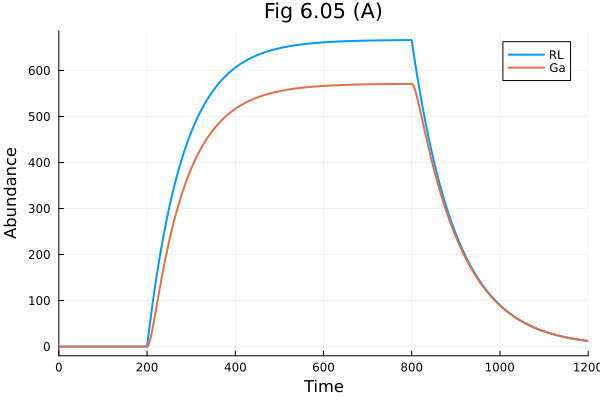

In [4]:
tend = 1200.0
prob = ODEProblem(osys, [], tend)

sol = solve(prob, Rodas5P(), abstol=1e-8, reltol=1e-8)

@unpack RL, Ga = osys
plot(sol, idxs=[RL, Ga], title="Fig 6.05 (A)", xlabel="Time", ylabel="Abundance")

## Fig 6.5 B

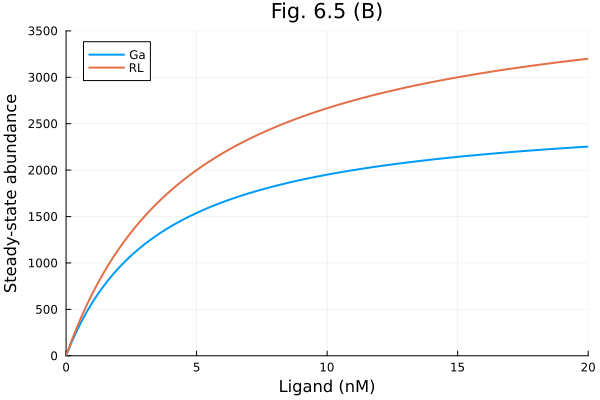

In [5]:
lrange = range(0, 20 * 1e-9, 101)

prob_func = (prob, i, repeat) -> remake(prob, p=[L => lrange[i]])
prob = SteadyStateProblem(osys, [], [])
trajectories = length(lrange)
alg = DynamicSS(Rodas5())
eprob = EnsembleProblem(prob; prob_func)
sim = solve(eprob, alg; trajectories, abstol=1e-10, reltol=1e-10)

ga = map(s->s[Ga], sim)
rl = map(s->s[RL], sim)
plot(lrange .* 1e9, [ga rl], label=["Ga" "RL"], title="Fig. 6.5 (B)",
xlabel="Ligand (nM)", ylabel="Steady-state abundance", xlims=(0, 20), ylims=(0, 3500))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*